In [4]:
import xgboost as xgb
import pandas as pd
import numpy as np
import os,re,sys

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[data load and preprocess](#1)
2.	[Model preparation](#2)
3.	[Build Models](#3)
4.	[check performance](#4)

### **1. data load and preprocess**<a class="anchor" id="1"></a>
[Table of Contents](#0.1)

#### 1.1 config data path (change the location)

In [5]:
path_data = r'C:\Users\xiaoyaohou\Documents\Aquant\DEMO\Xgboost'  
file_data = 'Random Price Dataset Trial Assignment.xlsx'
sheet_name= 'Raw data'

#### 1.2 read data sheet of the excel file (need to install openpyxl [pip install openpyxl] )

In [6]:
df_file = pd.read_excel(os.path.join(path_data, file_data), sheet_name = sheet_name)

In [7]:
df_file.head()

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,2000-01-01,41.0,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,NaN,NaN,6833222.0,2649293.0,35239920.0,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,41.0,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,NaN,NaN,5647987.0,2787667.0,36716752.0,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,45.0,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,NaN,NaN,6721125.0,4692701.0,45144561.0,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,47.0,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,NaN,NaN,7169182.0,2565068.0,32240349.0,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,47.0,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,NaN,NaN,10466333.0,4671325.0,29351633.0,NaN,NaN,NaN,NaN,NaN


#### 1.3 check data distribution and range

In [8]:
df_file.describe()

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
count,276.000000,185.000000,125.000000,276.000000,276.000000,276.000000,275.000000,275.000000,275.000000,275.000000,...,1.080000e+02,1.540000e+02,1.680000e+02,1.680000e+02,2.400000e+02,1.780000e+02,1.540000e+02,1.080000e+02,1.530000e+02,0.0
mean,72.371377,57.979730,60.396000,62.505688,65.403768,2.570399,29591.894215,7176.495470,89.579463,185.978265,...,3.178024e+07,1.201470e+07,4.689177e+07,1.877743e+07,5.951620e+07,1.213508e+08,6.680952e+07,5.684049e+08,1.751055e+07,NaN
std,19.415335,13.116195,12.647484,26.065922,29.612183,0.780782,12303.526704,3764.254058,46.390987,31.712684,...,1.237663e+07,4.129202e+06,3.325299e+07,1.343147e+07,2.303410e+07,2.341668e+07,1.284275e+07,1.436171e+08,5.951273e+06,NaN
min,32.000000,28.000000,33.250000,16.550000,18.380000,1.086000,6375.600000,863.100000,22.119907,135.000000,...,1.222930e+07,4.023189e+06,5.210434e+06,2.565068e+06,1.864643e+06,6.521024e+07,3.946846e+07,2.790990e+08,2.288267e+06,NaN
25%,57.750000,49.000000,53.000000,41.000000,42.727500,1.982000,20508.605662,3644.347996,60.831129,155.650000,...,2.197529e+07,9.039823e+06,1.301532e+07,7.166384e+06,4.257762e+07,1.052432e+08,5.695974e+07,4.541179e+08,1.415546e+07,NaN
50%,73.000000,59.000000,59.000000,59.280000,62.770000,2.555000,31563.988155,8080.515063,78.408574,193.400000,...,2.905798e+07,1.148613e+07,4.411321e+07,1.302269e+07,6.296210e+07,1.211287e+08,6.562112e+07,5.796089e+08,1.701399e+07,NaN
75%,86.000000,67.000000,67.500000,84.170000,85.587500,3.149000,39575.405922,9741.468033,107.593858,208.600000,...,3.983874e+07,1.473999e+07,7.409663e+07,3.050157e+07,7.249226e+07,1.364749e+08,7.409497e+07,6.691375e+08,2.170501e+07,NaN
max,108.000000,92.000000,100.750000,133.930000,132.720000,4.929000,52081.070497,16678.510021,280.787619,278.025000,...,7.870940e+07,2.417119e+07,1.234086e+08,5.262447e+07,1.194858e+08,1.866896e+08,1.094211e+08,8.865592e+08,2.943658e+07,NaN


In [9]:
print(df_file.columns.tolist())

['Date', 'Domestic Market (Contract) Blow Molding, Low', 'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU', 'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111', 'PCU325211325211', 'PCU32611332611301', 'WPU0915021625', 'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115', 'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622', 'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ', 'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export', 'India_export', 'Russia_export', 'South_Africa_export', 'Turkey', 'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export', 'China_export', 'Australia _import', 'Canada_import', 'Saudi_import', 'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import', 'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import', 'United Kingdome_import', 'China_import', 'Japan_import', 'South_korea_import']


#### 1.4 missing rate check

In [10]:
def missing_zero_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([ mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0: 'Missing Values', 1 : '% of Total Values'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mz_table.shape[0]) +
          " columns that have missing values.")
    return mz_table

In [11]:
df_rate_missing = missing_zero_values_table(df_file)

Your selected dataframe has 50 columns and 276 Rows.
There are 43 columns that have missing values.


In [12]:
print(df_rate_missing.head())

                    Missing Values  % of Total Values Data Type
South_korea_import             276              100.0   float64
Saudi_export                   243               88.0    object
Saudi_import                   243               88.0   float64
Australia _export              238               86.2    object
Russia_import                  168               60.9   float64


In [13]:
ls_col_missing = df_rate_missing[df_rate_missing['% of Total Values'] > 50].index.tolist()

In [14]:
df_file_good =  df_file.drop(columns= ls_col_missing )

#### 1.4 data preprocess

In [15]:
df_file_good.sort_values(by = 'Date', inplace = True)

### **2. Model preparation**<a class="anchor" id="2"></a>
[Table of Contents](#0.1)

#### 2.1 add target vars

In [16]:
var_target = 'Domestic Market (Contract) Blow Molding, Low'
var_target_N1 = 'N1 - Domestic Market (Contract) Blow Molding, Low'

In [17]:
df_file_good.loc[:, var_target_N1] = df_file_good[var_target].shift(-1)
df_file_good = df_file_good.iloc[:-1, :]

#### 2.2 select potential feature list

In [18]:
ls_features = df_file_good.iloc[:, 2:-1].columns.tolist()

In [19]:
data_features = df_file_good[ls_features].to_numpy()

In [20]:
data_target = df_file_good[var_target_N1].to_numpy()

### **3. Build Models**<a class="anchor" id="3"></a>
[Table of Contents](#0.1)

In [21]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(data_features,data_target,test_size=0.2,random_state=0)
xgb_train=xgb.DMatrix(x_train,label=y_train, feature_names = ls_features)
xgb_test=xgb.DMatrix(x_test,label=y_test, feature_names = ls_features)

In [40]:
params={
    'booster':'gbtree',
    'objective':'reg:linear',
    'gamma':0.1,
    'max_depth':6,
    'lambda':10,
    'subsample':0.8,
    'eta':0.1
}
num_rounds=100
watchlist=[(xgb_train,'train'),(xgb_test,'test')]
model=xgb.train(params,xgb_train,num_rounds,watchlist)

[14:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:67.73696	test-rmse:68.11134
[1]	train-rmse:61.74745	test-rmse:61.88752
[2]	train-rmse:56.36762	test-rmse:56.38040
[3]	train-rmse:51.38975	test-rmse:51.19661
[4]	train-rmse:46.93685	test-rmse:46.68635
[5]	train-rmse:42.88660	test-rmse:42.58390
[6]	train-rmse:39.22374	test-rmse:38.94482
[7]	train-rmse:35.89080	test-rmse:35.54819
[8]	train-rmse:32.85225	test-rmse:32.48084
[9]	train-rmse:30.05625	test-rmse:29.67994
[10]	train-rmse:27.51651	test-rmse:27.11655
[11]	train-rmse:25.25147	test-rmse:24.89901
[12]	train-rmse:23.18927	test-rmse:22.84712
[13]	train-rmse:21.33434	test-rmse:20.96970
[14]	train-rmse:19.63902	test-rmse:19.21328
[15]	train-rmse:18.09286	test-rmse:17.65371
[16]	train-rmse:16.70709	test-rmse:16.27592
[17]	train-rmse:15.41503	test-r

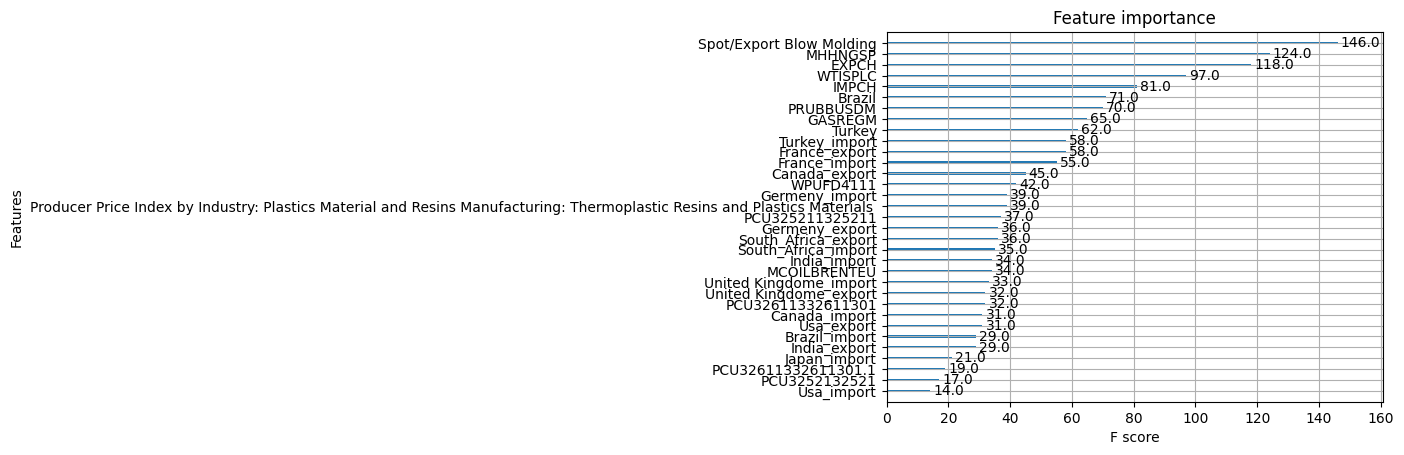

In [41]:
plot_importance(model)
plt.show()

### **4. check performance**<a class="anchor" id="4"></a>
[Table of Contents](#0.1)

In [43]:
test_predicted=model.predict(xgb_test)
test_predicted

array([ 75.19464 ,  72.53297 ,  76.29952 ,  90.95979 ,  75.46485 ,
        87.36951 ,  77.96897 ,  45.917053,  85.645874,  82.01125 ,
        70.31575 ,  63.980347,  52.17797 ,  50.18816 ,  88.11809 ,
        73.8902  ,  89.49256 , 100.48458 ,  43.63549 ,  67.10887 ,
        74.506065,  65.80147 ,  88.37702 ,  40.575806,  67.95959 ,
        95.99494 ,  68.814606,  46.85112 ,  76.97196 ,  80.6821  ,
        56.915977,  92.44961 ,  78.38244 ,  94.22012 , 101.15728 ,
        67.6343  ,  96.46031 , 103.587036,  80.21997 ,  63.461235,
        73.05976 ,  73.113785,  92.03264 ,  57.06444 , 102.9124  ,
        62.33329 ,  38.42173 ,  74.20483 ,  61.542717,  83.575485,
        88.912285,  46.587563,  91.44322 ,  91.52987 ,  37.52625 ],
      dtype=float32)

#### 4.1 R2 score

In [44]:
from sklearn.metrics import r2_score
r2_score(test_predicted, y_test)

0.9218370052362429

#### 4.2 RMSE score

In [45]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_predicted, y_test))

4.894456126019541

#### 4.3 MSE score

In [46]:
mean_squared_error(test_predicted, y_test)

23.955700769530218